## Install Dependencies

**Install model training dependencies**

In [1]:
# %%capture
# !pip install -U torch torchvision torchaudio
# !pip install -U fastai==2.7.9
# !pip install -U kaggle
# !pip install -U Pillow
# !pip install -U timm

**Install Tensorflow.js conversion dependencies**

In [2]:
# %%capture
# !pip install -U onnxruntime
# !pip install onnx-tf
# !pip install tensorflowjs
# !pip install tensorflow_probability
# !pip install onnx-simplifier
# !pip install simple-onnx-processing-tools
# !pip install -U onnx_graphsurgeon --index-url https://pypi.ngc.nvidia.com

## Import Dependencies

**Import all fastai computer vision functionality**

In [3]:
from fastai.vision.all import *

**Import pandas and disable column and row limits**

In [4]:
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Import timm library**

In [5]:
import timm

In [6]:
timm.__version__

'0.6.7'

## Select a Model

**View available ResNet models**

In [7]:
pd.DataFrame(timm.list_models('resnet*', pretrained=True))

,0
0,resnet10t
1,resnet14t
2,resnet18
3,resnet18d
4,resnet26
5,resnet26d
6,resnet26t
7,resnet32ts
8,resnet33ts
9,resnet34


**Inspect config for specific model**

In [8]:
from timm.models import resnet
resnet_model = 'resnet18'
pd.DataFrame.from_dict(resnet.default_cfgs[resnet_model], orient='index')

,0
url,https://download.pytorch.org/models/resnet18-5c106cde.pth
num_classes,1000
input_size,"(3, 224, 224)"
pool_size,"(7, 7)"
crop_pct,0.875
interpolation,bilinear
mean,"(0.485, 0.456, 0.406)"
std,"(0.229, 0.224, 0.225)"
first_conv,conv1
classifier,fc


**View available ConvNeXt models**

In [9]:
pd.DataFrame(timm.list_models('convnext*', pretrained=True))

,0
0,convnext_base
1,convnext_base_384_in22ft1k
2,convnext_base_in22ft1k
3,convnext_base_in22k
4,convnext_large
5,convnext_large_384_in22ft1k
6,convnext_large_in22ft1k
7,convnext_large_in22k
8,convnext_nano
9,convnext_small


**Inspect config for specific model**

In [10]:
from timm.models import convnext
convnext_model = 'convnext_nano'
pd.DataFrame.from_dict(convnext.default_cfgs[convnext_model], orient='index')

,0
url,https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth
num_classes,1000
input_size,"(3, 224, 224)"
pool_size,"(7, 7)"
crop_pct,0.95
interpolation,bicubic
mean,"(0.485, 0.456, 0.406)"
std,"(0.229, 0.224, 0.225)"
first_conv,stem.0
classifier,head.fc


**Select a model**

In [11]:
# model_type = resnet
# model_name = resnet_model

In [12]:
model_type = convnext
model_name = convnext_model

**Extract normalization stats from model config**

In [13]:
mean = model_type.default_cfgs[model_name]['mean']
std = model_type.default_cfgs[model_name]['std']
mean, std

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

## Download the Dataset

### Kaggle API
* [GitHub Repository](https://github.com/Kaggle/kaggle-api)
* [Documentation](https://github.com/Kaggle/kaggle-api#competitions)
* Install: `pip install kaggle`
* Need to get an API Key for your Kaggle account
    * [https://www.kaggle.com/me/account](https://www.kaggle.com/me/account)

**Enter Kaggle username and API token**

In [14]:
creds = '{"username":"","key":""}'

**Save Kaggle credentials if none are present**
* **Source:** [https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb)

In [15]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
# Save API key to a json file if it does not already exist
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

**Import Kaggle API**

In [16]:
from kaggle import api

**Select a dataset**

In [17]:
dataset_name = 'hagrid-classification-512p-no-gesture-150k'
# dataset_name = 'hagrid-classification-512p-no-gesture-300k'
# dataset_name = 'hagrid-classification-512p-no-gesture'

kaggle_dataset = f'innominate817/{dataset_name}'

**Define path to dataset**

In [18]:
archive_dir = URLs.path()
dataset_dir = archive_dir/'../data'
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')
dataset_path = Path(f'{dataset_dir}/{dataset_name}')

**Define method to extract the dataset from an archive file**

In [19]:
def file_extract(fname, dest=None):
    "Extract `fname` to `dest` using `tarfile` or `zipfile`."
    if dest is None: dest = Path(fname).parent
    fname = str(fname)
    if   fname.endswith('gz'):  tarfile.open(fname, 'r:gz').extractall(dest)
    elif fname.endswith('zip'): zipfile.ZipFile(fname     ).extractall(dest)
    else: raise Exception(f'Unrecognized archive: {fname}')

**Download the dataset if it is not present**

In [20]:
if not archive_path.exists():
    api.dataset_download_cli(kaggle_dataset, path=archive_dir)
    file_extract(fname=archive_path, dest=dataset_path)

## Inspect the Dataset

**Inspect the dataset path**

In [21]:
pd.DataFrame(list(dataset_path.ls()))

,0
0,/home/innom-dt/.fastai/archive/../data/hagrid-classification-512p-no-gesture-150k/hagrid-classification-512p-no-gesture-150k


**Get image file paths**

In [22]:
img_dir = dataset_path/dataset_name

In [23]:
files = get_image_files(img_dir)
len(files)

154816

**Inspect files**

In [24]:
pd.DataFrame([files[0], files[-1]])

,0
0,/home/innom-dt/.fastai/archive/../data/hagrid-classification-512p-no-gesture-150k/hagrid-classification-512p-no-gesture-150k/stop/3ac51cf4-cd81-4803-a608-76a55b36df26.jpeg
1,/home/innom-dt/.fastai/archive/../data/hagrid-classification-512p-no-gesture-150k/hagrid-classification-512p-no-gesture-150k/two_up/d5a0a30d-92aa-4a7c-9621-1fed0e8f0b66.jpeg


**Inspect class folder names**

In [25]:
folder_names = [path.name for path in Path(img_dir).ls()]
if 'models' in folder_names: 
    os.removedirs(img_dir/'models')
    folder_names.remove('models')
folder_names.sort()
print(f"Num classes: {len(folder_names)}")
pd.DataFrame(folder_names)

Num classes: 19


,0
0,call
1,dislike
2,fist
3,four
4,like
5,mute
6,no_gesture
7,ok
8,one
9,palm


**Inspect one of the training images**

Class: stop
Image Dims: (512, 512)


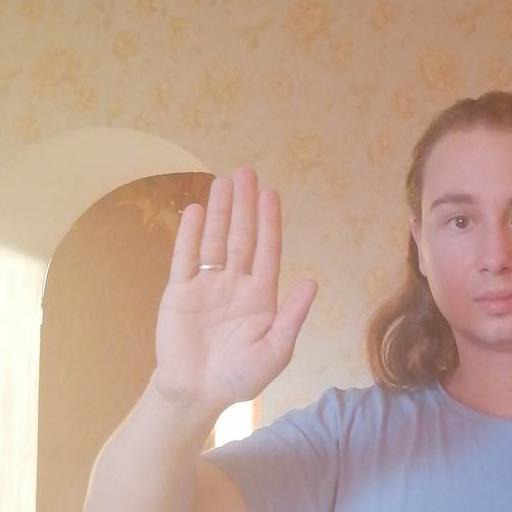

In [26]:
import PIL
img = PIL.Image.open(files[0])
print(f"Class: {files[0].parent.name}")
print(f"Image Dims: {img.shape}")
img

## Define DataLoaders

**Define target input dimensions**

In [27]:
size_1_1 = (256, 256)
size_16_9 = (216, 384)
size = size_1_1

**Define Transforms**

In [28]:
item_tfms = [Resize(size, method=ResizeMethod.Pad, pad_mode=PadMode.Border)]

batch_tfms = [
    *aug_transforms(
        size=size, 
        mult=1.0,
        do_flip=True,
        flip_vert=False,
        max_rotate=0.0,
        min_zoom=1.0,
        max_zoom=1.1,
        max_lighting=0.2,
        max_warp=0.2, 
        p_affine=0.75,
        pad_mode=PadMode.Border)
]

**Note:** The fastai library automatically normalizes timm models as of version [2.7.5](https://github.com/fastai/fastai/releases/tag/2.7.5).

**Define batch size**

In [29]:
bs = 32

**Define DataLoaders object**

In [30]:
dls = ImageDataLoaders.from_folder(
    path=img_dir, 
    valid_pct=0.2, 
    bs=bs, 
    item_tfms=item_tfms, 
    batch_tfms=batch_tfms
)

**Verify DataLoaders object**

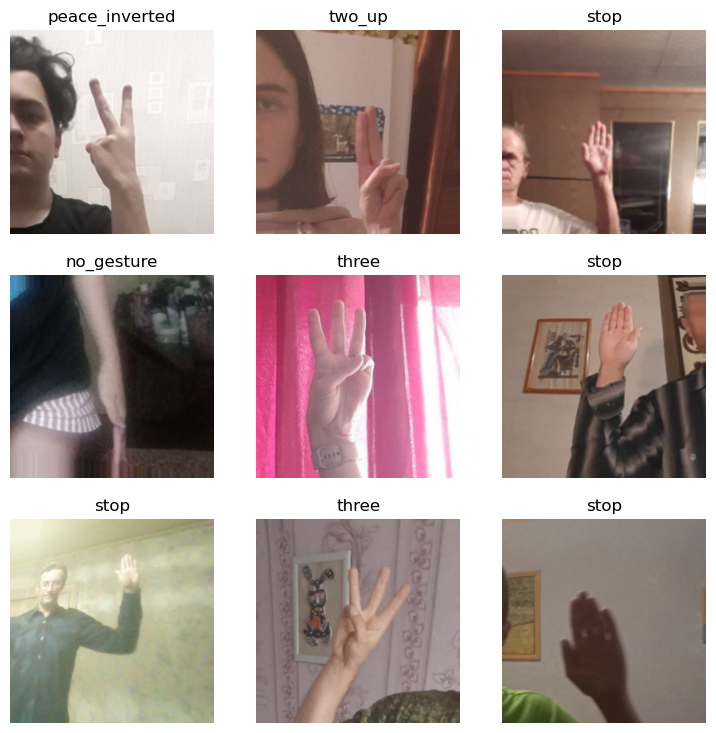

In [31]:
dls.train.show_batch()

## Finetune the Model

**Define [metrics](https://docs.fast.ai/metrics.html)**

In [32]:
metrics = [error_rate, accuracy]

**Define Learner object**

In [33]:
learn = vision_learner(dls, model_name, metrics=metrics)

**Define model checkpoint file path**

In [34]:
checkpoint_path = Path(f"{dataset_path.name}-{model_name}.pth")
checkpoint_path

Path('hagrid-classification-512p-no-gesture-150k-convnext_nano.pth')

**Load existing checkpoint (Optional)**

In [35]:
# if checkpoint_path.exists():
#     print("Loading checkpoint...")
#     checkpoint = torch.load(checkpoint_path)
#     learn.model.load_state_dict(checkpoint)

**Find learning rate**

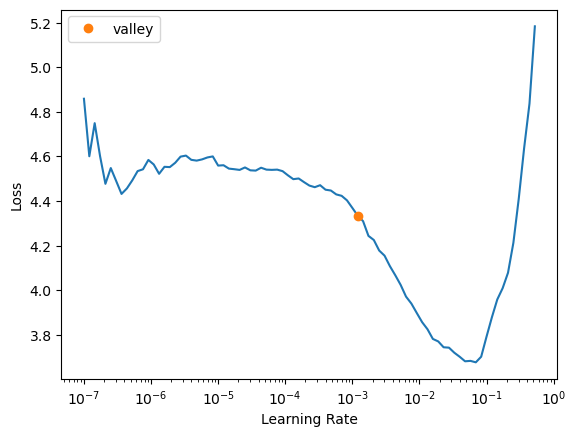

In [36]:
suggested_lrs = learn.lr_find()

**Define learning rate**

In [37]:
lr = suggested_lrs.valley*3
lr

0.003606793354265392

**Define number of epochs**

In [38]:
epochs = 4

**Define callbacks**

In [39]:
cbs = [MixedPrecision()]

**Fine tune model**

In [40]:
learn.fine_tune(epochs, base_lr=lr, cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.372442,0.189683,0.061299,0.938701,04:22


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.096614,0.054749,0.017214,0.982786,05:29
1,0.048555,0.033598,0.010012,0.989988,05:34
2,0.030899,0.018264,0.005555,0.994445,05:32
3,0.018128,0.015447,0.004877,0.995123,05:30


**Save model checkpoint**

In [41]:
torch.save(learn.model.state_dict(), checkpoint_path)

**Make predictions for a group of images**

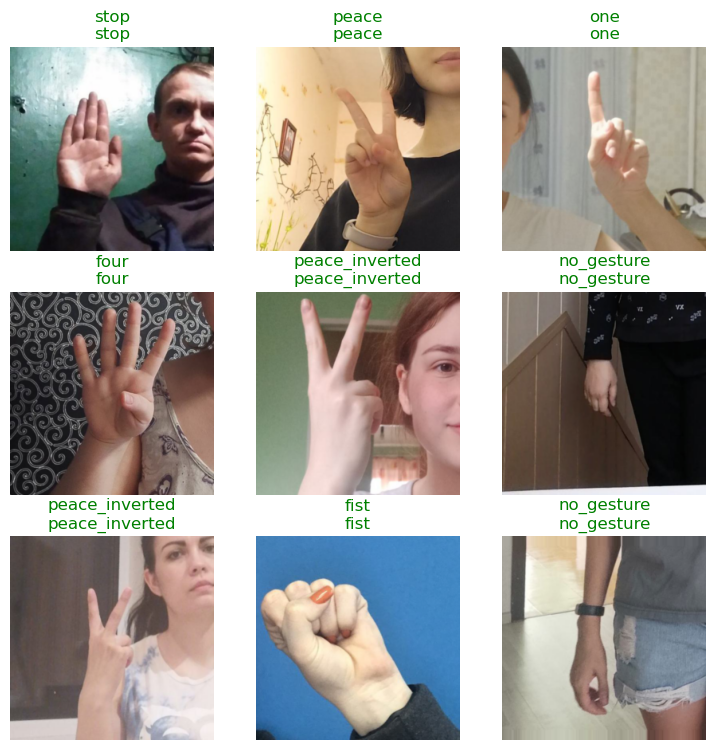

In [42]:
learn.show_results()

**Define an Interpretation object**

In [43]:
interp = Interpretation.from_learner(learn)

**Plot top losses**

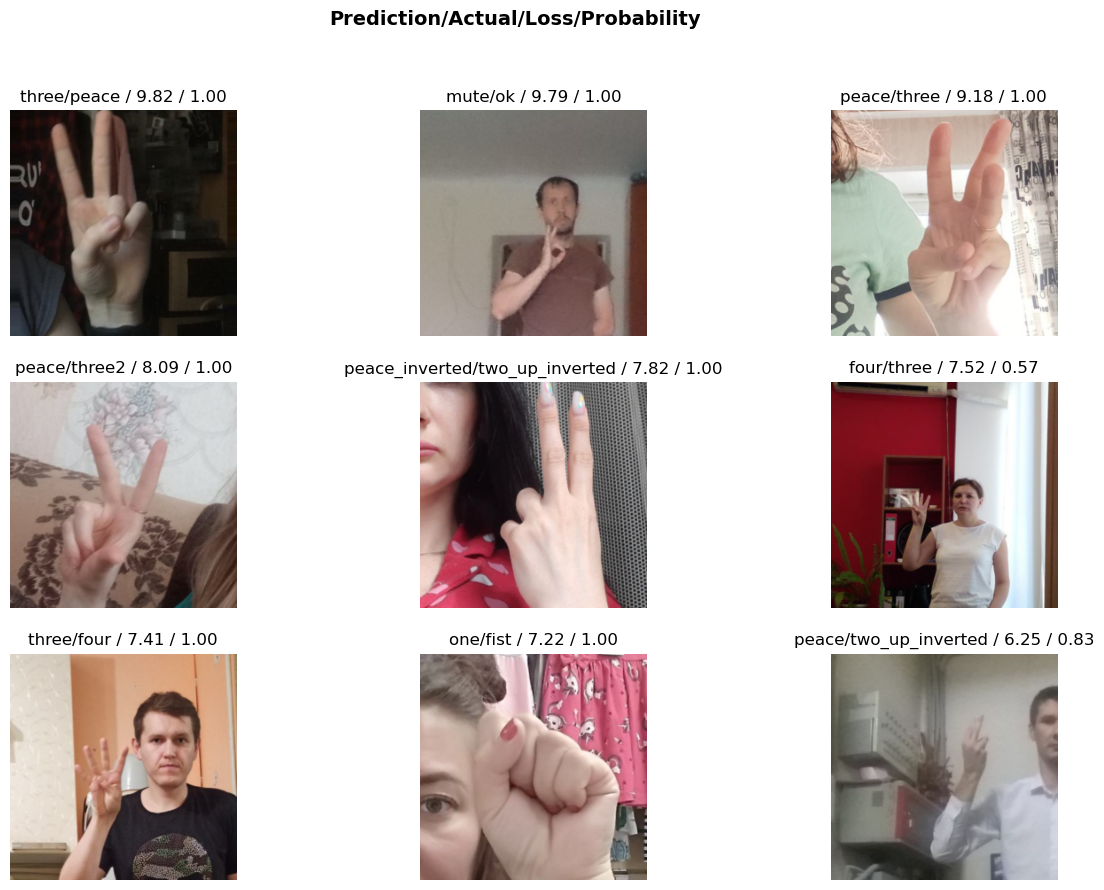

In [44]:
interp.plot_top_losses(k=9, figsize=(15,10))

## Clean Dataset (Optional)

**Import fastai [ImageClassifierCleaner](https://docs.fast.ai/vision.widgets.html#imageclassifiercleaner)**

In [45]:
# from fastai.vision.widgets import ImageClassifierCleaner

**Mark images to delete or move**

In [46]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

**Inspect samples to change**

In [47]:
# cleaner.change()

**Move selected samples to target class folder**  

In [48]:
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), img_dir/cat)

**Inspect samples to delete**

In [49]:
# cleaner.delete()

**Delete selected samples**

In [50]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()

**Note:** Restart notebook and finetune the trained model after cleaning the dataset.

## Test the Model

**Select a test image**

In [51]:
import PIL

In [52]:
test_file = files[0]
test_file.parent.name, test_file.name

('stop', '3ac51cf4-cd81-4803-a608-76a55b36df26.jpeg')

Source image size: (512, 512)


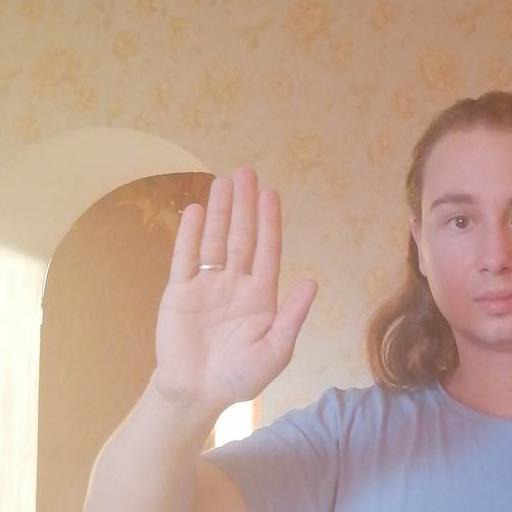

In [53]:
test_img = PIL.Image.open(test_file)
print(f"Source image size: {test_img.size}")
test_img

**Set target size**

In [55]:
size = size_16_9
size

(216, 384)

**Option 1: Pad to target input dims**

Padded image size: (384, 216)


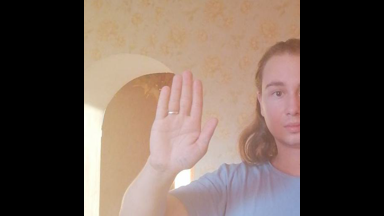

In [56]:
padded_img = PIL.ImageOps.pad(test_img, [size[1], size[0]], method=PIL.Image.Resampling.BICUBIC)
print(f"Padded image size: {padded_img.size}")
padded_img

**Option 2: Stretch to target input dims**

Stretched image size: (384, 216)


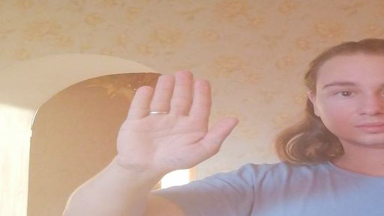

In [57]:
stretched_img = test_img.resize([size[1], size[0]])
print(f"Stretched image size: {stretched_img.size}")
stretched_img

**Make a prediction on padded image using a [fastai.vision.core.PILImage](https://docs.fast.ai/vision.core.html#PILImage)**

In [58]:
pred = learn.predict(PILImage(padded_img))
pred, pred[2].max()

(('stop',
  TensorBase(13),
  TensorBase([5.6481e-08, 2.9167e-09, 1.7013e-08, 1.0619e-07, 7.0342e-09, 4.3362e-10,
          1.9056e-08, 7.8481e-07, 1.9450e-08, 5.0064e-06, 3.8272e-09, 8.2519e-11,
          4.3597e-08, 9.9999e-01, 2.3984e-08, 1.0935e-08, 2.4180e-09, 2.1497e-08,
          5.9654e-10])),
 TensorBase(1.0000))

**Make a prediction on stretched image using a [fastai.vision.core.PILImage](https://docs.fast.ai/vision.core.html#PILImage)**

In [59]:
pred = learn.predict(PILImage(stretched_img))
pred, pred[2].max()

(('stop',
  TensorBase(13),
  TensorBase([1.3940e-06, 4.6373e-07, 1.3970e-04, 6.4621e-07, 6.8510e-08, 9.9468e-09,
          1.1748e-07, 1.3881e-06, 1.1672e-06, 3.1076e-04, 9.0491e-09, 7.7261e-10,
          8.4245e-08, 9.9954e-01, 1.7898e-07, 2.6569e-08, 3.4712e-08, 2.2750e-08,
          6.5716e-09])),
 TensorBase(0.9995))

**Inspect the `after_item` pipeline**

In [60]:
learn.dls.after_item

Pipeline: Resize -- {'size': (256, 256), 'method': 'pad', 'pad_mode': 'border', 'resamples': (<Resampling.BILINEAR: 2>, <Resampling.NEAREST: 0>), 'p': 1.0} -> ToTensor

**Inspect the `after_batch` pipeline**

In [61]:
learn.dls.after_batch

Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': (256, 256), 'mode': 'bilinear', 'pad_mode': 'border', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0'), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]], device='cuda:0'), 'axes': (0, 2, 3)}

**Convert image to tensor**

In [62]:
img_tensor = tensor(padded_img).permute(2, 0, 1)
img_tensor.shape, img_tensor

(torch.Size([3, 216, 384]),
 tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8))

**Scale tensor values**

In [63]:
scaled_tensor = img_tensor.float().div_(255)

**Prepare mean values**

In [64]:
mean_tensor = tensor(mean).view(1,1,-1).permute(2, 0, 1)
mean_tensor.shape, mean_tensor

(torch.Size([3, 1, 1]),
 tensor([[[0.4850]],
 
         [[0.4560]],
 
         [[0.4060]]]))

**Prepare std_dev values**

In [65]:
std_tensor = tensor(std).view(1,1,-1).permute(2, 0, 1)
std_tensor.shape, std_tensor

(torch.Size([3, 1, 1]),
 tensor([[[0.2290]],
 
         [[0.2240]],
 
         [[0.2250]]]))

**Normalize and batch image tensor**

In [66]:
normalized_tensor = (scaled_tensor - mean_tensor) / std_tensor
batched_tensor = normalized_tensor.unsqueeze(dim=0)
batched_tensor.shape, batched_tensor

(torch.Size([1, 3, 216, 384]),
 tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -

**Pass tensor to model**

In [67]:
with torch.no_grad():
    preds = learn.model.cuda()(batched_tensor.cuda())
preds

TensorBase([[-1.3403, -3.0848, -0.5185, -0.0443, -2.5254, -5.1108, -2.8625,  2.2441,
         -1.2774,  3.7167, -4.5050, -7.2047, -1.8664, 15.3311, -1.5778, -3.4191,
         -5.5522, -1.3806, -4.7725]], device='cuda:0')

**Process model output**

In [68]:
torch.nn.functional.softmax(preds, dim=1)

TensorBase([[5.7499e-08, 1.0048e-08, 1.3079e-07, 2.1014e-07, 1.7579e-08, 1.3248e-09,
         1.2548e-08, 2.0718e-06, 6.1235e-08, 9.0345e-06, 2.4281e-09, 1.6322e-10,
         3.3977e-08, 9.9999e-01, 4.5344e-08, 7.1924e-09, 8.5203e-10, 5.5232e-08,
         1.8581e-09]], device='cuda:0')

In [69]:
preds.argmax()

TensorBase(13, device='cuda:0')

In [70]:
torch.nn.functional.softmax(preds, dim=1)[0][preds.argmax()]

TensorBase(1.0000, device='cuda:0')

**Get the class labels**

In [71]:
learn.dls.vocab

['call', 'dislike', 'fist', 'four', 'like', 'mute', 'no_gesture', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']

**Get the predicted class label**

In [72]:
learn.dls.vocab[torch.nn.functional.softmax(preds, dim=1).argmax()]

'stop'

## Export the Model

**Define ONNX opset version**

In [73]:
opset = 15

**Define ONNX file name**

In [74]:
onnx_file_name = f"{dataset_path.name}-{learn.arch}-opset{opset}.onnx"
print(onnx_file_name)

hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15.onnx


**Export trained model to ONNX**

In [75]:
torch.onnx.export(learn.model.cpu(),
                  batched_tensor,
                  onnx_file_name,
                  export_params=True,
                  opset_version=opset,
                  do_constant_folding=True,
                  input_names = ['input'],
                  output_names = ['output'],
                  dynamic_axes={'input': {2 : 'height', 3 : 'width'}}
                 )

/home/innom-dt/mambaforge/envs/fastai-base/lib/python3.10/site-packages/torch/onnx/symbolic_helper.py:719: UserWarning: allowzero=0 by default. In order to honor zero value in shape use allowzero=1
  warnings.warn("allowzero=0 by default. In order to honor zero value in shape use allowzero=1")


**Import dependencies for TensorFlow.js conversion**

In [76]:
import onnx
from scc4onnx import order_conversion
from onnxsim import simplify
from onnx_tf.backend import prepare

2022-10-02 23:30:04.156599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 23:30:04.477328: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-02 23:30:04.601948: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-02 23:30:05.269191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

**Load ONNX model**

In [77]:
onnx_model = onnx.load(onnx_file_name)

**Inspect model input**

In [78]:
onnx_model.graph.input[0]

name: "input"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 3
      }
      dim {
        dim_param: "height"
      }
      dim {
        dim_param: "width"
      }
    }
  }
}

**Get input name**

In [79]:
input_name = onnx_model.graph.input[0].name
input_name

'input'

**Convert model input to channels-last format**

In [80]:
onnx_model = order_conversion(
    onnx_graph=onnx_model,
    input_op_names_and_order_dims={f"{input_name}": [0,2,3,1]},
    non_verbose=True
)

**Inspect updated model input**

In [81]:
onnx_model.graph.input[0]

name: "input"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_param: "height"
      }
      dim {
        dim_param: "width"
      }
      dim {
        dim_value: 3
      }
    }
  }
}

**Simplify ONNX model**

In [82]:
onnx_model, check = simplify(onnx_model)
check

True

**Prepare ONNX model for Tensorflow Backend**

In [83]:
tf_rep = prepare(onnx_model)

2022-10-02 23:30:07.630305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 23:30:07.630838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 23:30:07.630942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 23:30:07.633259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

**Define path for TensorFlow [saved model](https://www.tensorflow.org/guide/saved_model) directory**

In [84]:
tf_model_dir = f"./{onnx_file_name.split('.')[0]}"
tf_model_dir

'./hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15'

**Export backend representation to a Tensorflow proto file**

In [85]:
tf_rep.export_graph(tf_model_dir)

INFO:tensorflow:Assets written to: ./hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15/assets


INFO:tensorflow:Assets written to: ./hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15/assets


**Define directory path to store tfjs model files**

In [86]:
tfjs_model_dir = f"{tf_model_dir}-tfjs-uint8"
tfjs_model_dir

'./hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15-tfjs-uint8'

**Define arguments for tfjs converter script**

In [87]:
from IPython.display import Markdown, display

In [88]:
tfjs_convert_command = f"""tensorflowjs_converter
                 --input_format=tf_saved_model 
                 --output_format=tfjs_graph_model 
                 --signature_name=serving_default 
                 --saved_model_tags=serve 
                 "{tf_model_dir}" 
                 "{tfjs_model_dir}"
                 "--quantize_uint8"
                 """
tfjs_convert_command = " ".join(tfjs_convert_command.split())
display(Markdown(f"```bash\n{tfjs_convert_command}\n```"))

```bash
tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model --signature_name=serving_default --saved_model_tags=serve "./hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15" "./hagrid-classification-512p-no-gesture-150k-convnext_nano-opset15-tfjs-uint8" "--quantize_uint8"
```

**Export SavedModel to TFJS format**

In [89]:
print("Exporting TensorFlow SavedModel to TensorFlow.js Graph model...")
conversion_result = %sx $tfjs_convert_command
print("\n".join(conversion_result))

Exporting TensorFlow SavedModel to TensorFlow.js Graph model...
2022-10-02 23:30:15.041884: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-02 23:30:15.371389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-02 23:30:15.371421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-02 23:30:15.371424: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

## Export Inference Data

In [90]:
import json

**Export class labels**

In [91]:
labels = [label.replace("train_val_", "") for label in list(learn.dls.vocab)]
labels

['call',
 'dislike',
 'fist',
 'four',
 'like',
 'mute',
 'no_gesture',
 'ok',
 'one',
 'palm',
 'peace',
 'peace_inverted',
 'rock',
 'stop',
 'stop_inverted',
 'three',
 'three2',
 'two_up',
 'two_up_inverted']

In [92]:
class_labels = {"classes": labels}
class_labels_file_name = f"{dataset_path.name}-classes.json"

with open(class_labels_file_name, "w") as write_file:
    json.dump(class_labels, write_file)

**Export model normalization stats**

In [93]:
normalization_stats = {"mean": list(mean), "std": list(std)}
normalization_stats_file_name = f"{learn.arch}-normalization_stats.json"

with open(normalization_stats_file_name, "w") as write_file:
    json.dump(normalization_stats, write_file)